Silhouette Score: 0.1778
Davies-Bouldin Index: 1.5512
Calinski-Harabasz Index: 2068.6360


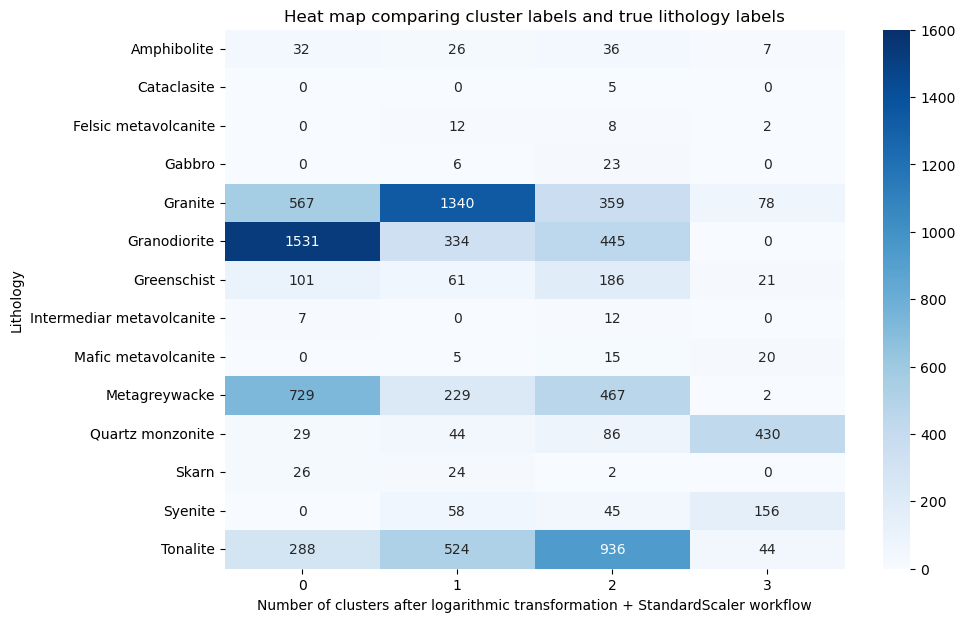

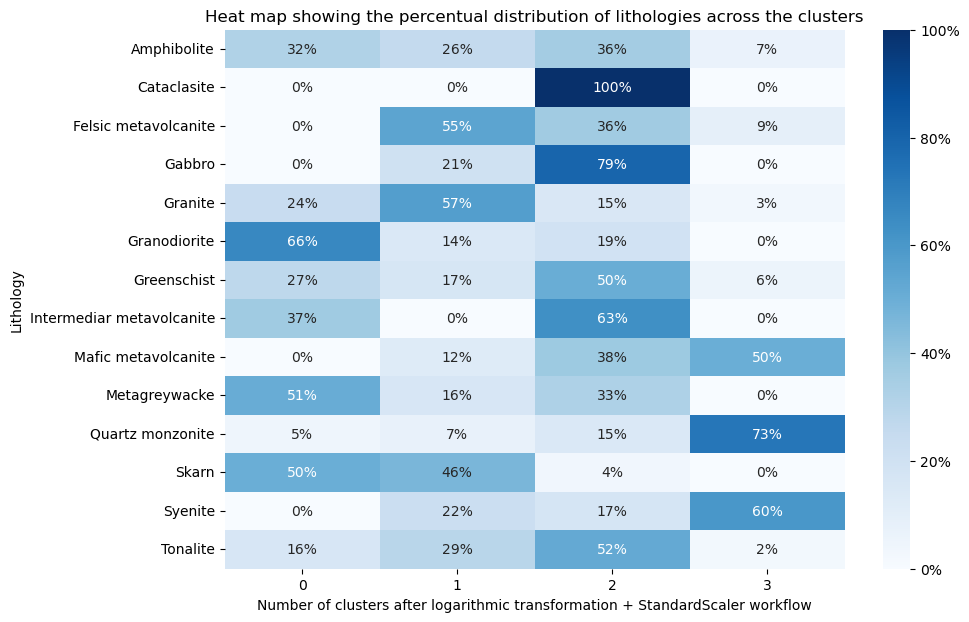

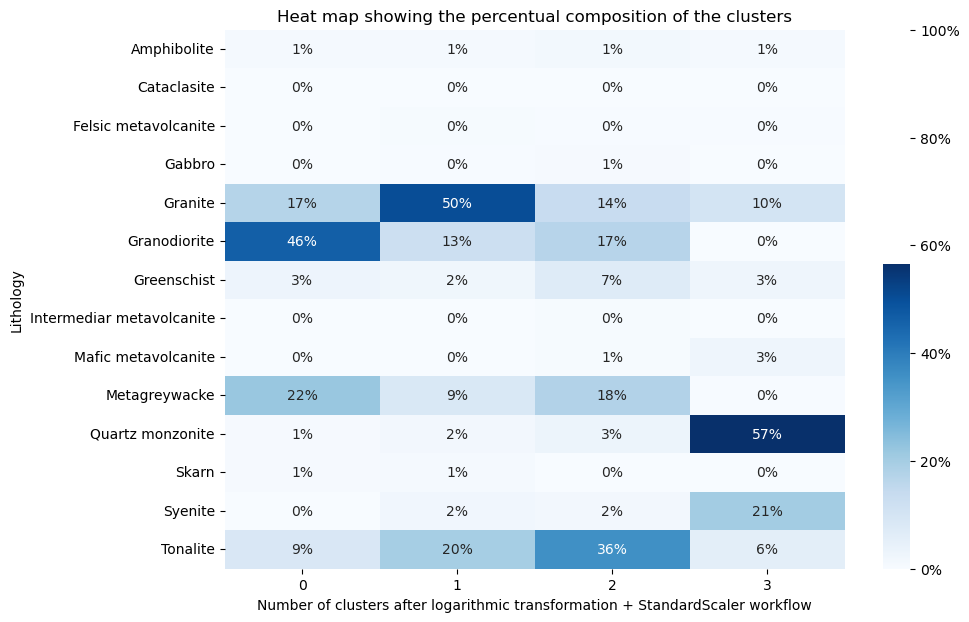

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


# import lithology 
lithology = pd.read_csv(r'C:\Users\Wilhelmine\Desktop\MASTERaktuell\i-edda TC DATA WIP\CLUSTER\Python\Lithology\Lithology_4_excl_oben_und_unten_beschnitten_Vp_Rdeep.csv', sep=';')

# import data
data = pd.read_csv(r'C:\Users\Wilhelmine\Desktop\MASTERaktuell\i-edda TC DATA WIP\CLUSTER\Python\MSUS Th U K Rdeep Vp minus 4 U zero values minus R minima.csv', sep=';')

# logarithmize data
data[['Th_log', 'U_log', 'K_log']] = np.log1p(data[['Th', 'U', 'K']])
data[['Vp_log', 'Rdeep_log']] = np.log(data[['Vp', 'Rdeep']])
data['MSUS_log'] = np.log1p(data['MSUS'] - data['MSUS'].min())

# scale logarithmized data
scaler = StandardScaler() 
features_to_scale = ['MSUS_log','Th_log','U_log','K_log','Vp_log','Rdeep_log']  
scaled_data = scaler.fit_transform(data[features_to_scale]) 
scaled_df = pd.DataFrame(scaled_data, columns=['MSUS_log_scaled','Th_log_scaled','U_log_scaled','K_log_scaled','Vp_log_scaled','Rdeep_log_scaled'])

# initialization of clustering parameters
X_clustering = scaled_df[['MSUS_log_scaled', 'Th_log_scaled', 'U_log_scaled', 'K_log_scaled','Vp_log_scaled','Rdeep_log_scaled']]

# k-means clustering 
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init=10, max_iter=100, random_state=42).fit(X_clustering) 

# adding cluster labels to data
data['Cluster'] = kmeans.labels_

# join data and lithology 
data_with_lithology = pd.concat([data, lithology], axis='columns') 

# specify lithology labels
lithology_labels = lithology['Lithology']



# internal metrics
silhouette = silhouette_score(X_clustering, data['Cluster'])
dbi = davies_bouldin_score(X_clustering, data['Cluster'])
chs = calinski_harabasz_score(X_clustering, data['Cluster'])

print(f"Silhouette Score: {silhouette:.4f}")
print(f"Davies-Bouldin Index: {dbi:.4f}")
print(f"Calinski-Harabasz Index: {chs:.4f}")



# 1. heat map of absolute values
# computation of the confusion matrix
confusion_matrix = pd.crosstab(lithology_labels, data_with_lithology['Cluster'])
confusion_matrix.head()

# visualization of the confusion matrix as a heat map
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=confusion_matrix.columns, 
            yticklabels=confusion_matrix.index, vmax=1600) 
plt.title('Heat map comparing cluster labels and true lithology labels')
plt.xlabel("Number of clusters after logarithmic transformation + StandardScaler workflow")
plt.ylabel("Lithology")
plt.savefig(r"C:\Users\Wilhelmine\Desktop\MASTERaktuell\Methoden\Abbildungen\Heat map comparing cluster labels and true lithology labels.jpg", dpi = 300, bbox_inches='tight')
plt.show()


# 2. heat map showing the percentual distribution of lithologies across the clusters
# computation of the percentual confusion matrix
confusion_matrix_percent = confusion_matrix.div(confusion_matrix.sum(axis=1), axis=0)

# visualization of the confusion matrix as a heat map
plt.figure(figsize=(10, 7))
ax = sns.heatmap(confusion_matrix_percent, annot=True, fmt=".0%", cmap='Blues', 
                 xticklabels=confusion_matrix.columns, yticklabels=confusion_matrix.index, 
                 cbar_kws={'format': '%.0f%%'})
colorbar = ax.collections[0].colorbar
colorbar.set_ticks(np.linspace(0, 1, 6))
colorbar.set_ticklabels([f'{int(x*100)}%' for x in np.linspace(0, 1, 6)])
plt.title('Heat map showing the percentual distribution of lithologies across the clusters')
plt.xlabel("Number of clusters after logarithmic transformation + StandardScaler workflow")
plt.ylabel("Lithology")
plt.savefig(r"C:\Users\Wilhelmine\Desktop\MASTERaktuell\Methoden\Abbildungen\Heat map showing which clusters the lithology is represented by.jpg", dpi=300, bbox_inches='tight')
plt.show()


# 3. heat map showing the percentual composition of the clusters
# computation of the percentual confusion matrix
confusion_matrix_cluster_percent = confusion_matrix.div(confusion_matrix.sum(axis=0), axis=1)

# visualization of the confusion matrix as a heat map
plt.figure(figsize=(10, 7))
ax = sns.heatmap(confusion_matrix_cluster_percent, annot=True, fmt=".0%", cmap='Blues',
                 xticklabels=confusion_matrix.columns, yticklabels=confusion_matrix.index,
                 cbar_kws={'format': '%.0f%%'})
colorbar = ax.collections[0].colorbar
colorbar.set_ticks(np.linspace(0, 1, 6))
colorbar.set_ticklabels([f'{int(x*100)}%' for x in np.linspace(0, 1, 6)])
plt.title('Heat map showing the percentual composition of the clusters')
plt.xlabel("Number of clusters after logarithmic transformation + StandardScaler workflow")
plt.ylabel("Lithology")
plt.savefig(r"C:\Users\Wilhelmine\Desktop\MASTERaktuell\Methoden\Abbildungen\Heat map showing which the composition of the clusters.jpg", dpi=300, bbox_inches='tight')
plt.show()



